<h3>Задача 2<h3>

Посчитать медианное значение площади стран Океании.

In [42]:
import pandas as pd
df = pd.read_csv('countries of the world.csv')
df.loc[df['Region'] == 'OCEANIA                            '].median()['Area (sq. mi.)']

811.0

Определить 10 стран с наименьшим уровнем грамотности.

In [43]:
df['Literacy'] = df['Literacy (%)'].astype(str).apply(lambda x: x.replace(',', '.')).astype('float')
#Меняю тип данных на float для сортировки
df.sort_values(by='Literacy')[:10]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Literacy
151,Niger,SUB-SAHARAN AFRICA,12525094,1267000,"9,9","0,00","-0,67","121,69",800.0,"17,6",...,"3,54","0,01","96,45",1,"50,73","20,91","0,39","0,17","0,44",17.6
31,Burkina Faso,SUB-SAHARAN AFRICA,13902972,274200,"50,7","0,00",0,"97,57",1100.0,"26,6",...,"14,43","0,19","85,38",2,"45,62","15,6","0,322","0,196","0,482",26.6
183,Sierra Leone,SUB-SAHARAN AFRICA,6005250,71740,"83,7","0,56",0,"143,64",500.0,"31,4",...,"6,98","0,89","92,13",2,"45,76","23,03","0,49","0,31","0,21",31.4
86,Guinea,SUB-SAHARAN AFRICA,9690222,245857,"39,4","0,13","-3,06","90,37",2100.0,"35,9",...,"3,63","2,58","93,79",2,"41,76","15,48","0,237","0,362","0,401",35.9
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",36.0
188,Somalia,SUB-SAHARAN AFRICA,8863338,637657,"13,9","0,47","5,37","116,7",500.0,"37,8",...,"1,67","0,04","98,29",1,"45,13","16,63","0,65","0,1","0,25",37.8
73,"Gambia, The",SUB-SAHARAN AFRICA,1641564,11300,"145,3","0,71","1,57","72,02",1700.0,"40,1",...,25,"0,5","74,5",2,"39,37","12,25","0,308","0,142","0,549",40.1
180,Senegal,SUB-SAHARAN AFRICA,11987121,196190,"61,1","0,27","0,2","55,51",1600.0,"40,2",...,"12,78","0,21","87,01",2,"32,78","9,42","0,172","0,209","0,619",40.2
97,Iraq,NEAR EAST,26783383,437072,"61,3","0,01",0,"50,25",1500.0,"40,4",...,"13,15","0,78","86,07",1,"31,98","5,37","0,073","0,666","0,261",40.4
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,"69,8","0,11",0,85,1100.0,"40,9",...,"18,08","2,4","79,52",2,"38,85","12,22","0,316","0,138","0,546",40.9


Построить график суммарной численности населения в разбивке по регионам.

<AxesSubplot:xlabel='Region'>

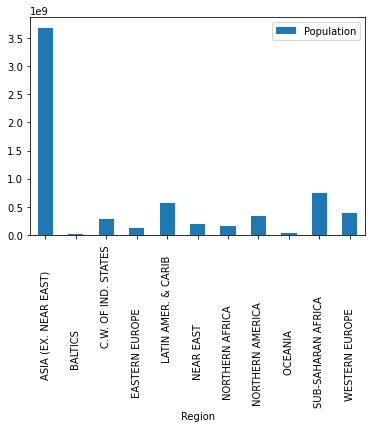

In [44]:
df.groupby('Region').sum()[['Population']].plot.bar()

На основании данных, ответить на вопрос, в каком регионе наблюдается наибольший миграционный отток населения.

In [45]:
df['Migration'] = df['Net migration'].astype(str).apply(lambda x: x.replace(',', '.')).astype('float')
df.groupby('Region').sum().sort_values(by='Migration').head(1)


,Population,Area (sq. mi.),GDP ($ per capita),Literacy,Migration
Region,,,,,
LATIN AMER. & CARIB,561824599,20544084,390700.0,3988.8,-67.25


<h3>Задача 3<h3>

In [53]:
import random

In [54]:
def getexp_theoretical(N):
    expnum = 0
    for i in range(0,N):
        expnum += 1/(1-i/N)
    return(expnum)

In [55]:
def getexp_experiment(N):
    sequence = range(1,N+1)
    general_number_of_experiments = 0
    for i in range(0,1000000):
        number_of_experiments = 0
        sequence_found = []
        while set(sequence_found)!=set(list(sequence)):
            this_number = random.randint(1,N)
            if this_number not in sequence_found:
                sequence_found.append(this_number)
            number_of_experiments += 1
        general_number_of_experiments+=number_of_experiments
    expnum = general_number_of_experiments/1000000
    return(expnum)

In [56]:
print(getexp_theoretical(7))
print(getexp_experiment(7))

18.149999999999995
18.152271
